In [1]:
#first install liberary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load dataset
df=pd.read_csv('Marketing_Data.csv')
df.sample(6)

,youtube,facebook,newspaper,sales
150,198.72,12.00,21.12,15.12
113,264.60,39.84,45.48,24.12
69,347.64,50.76,61.44,30.48
44,155.28,6.84,37.56,13.20
124,205.56,47.64,45.24,22.80
7,320.28,52.56,6.00,30.48


In [3]:
#check how many row and columns
df.shape

(171, 4)

In [4]:
#to check null value
df.isnull().sum()

youtube      0
facebook     0
newspaper    0
sales        0
dtype: int64

<AxesSubplot: >

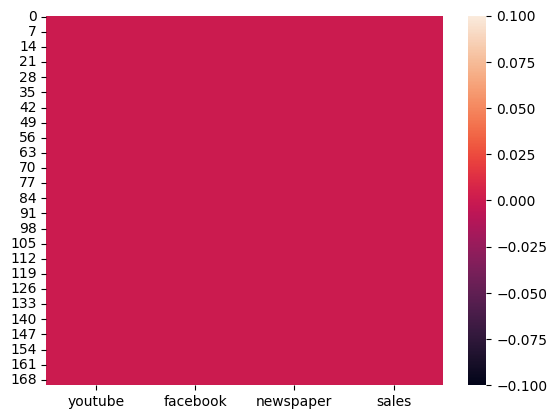

In [5]:
#visulize columns
sns.heatmap(df.isnull())

In [6]:
#check datatypes
df.dtypes

youtube      float64
facebook     float64
newspaper    float64
sales        float64
dtype: object

<AxesSubplot: >

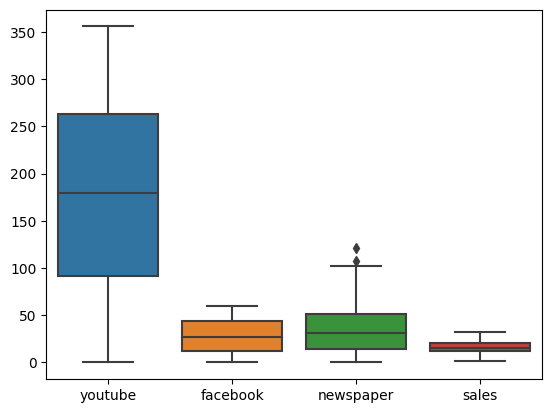

In [7]:
#check outlier
sns.boxplot(data=df)

In [8]:
#select input columns name
df.columns

Index(['youtube', 'facebook', 'newspaper', 'sales'], dtype='object')

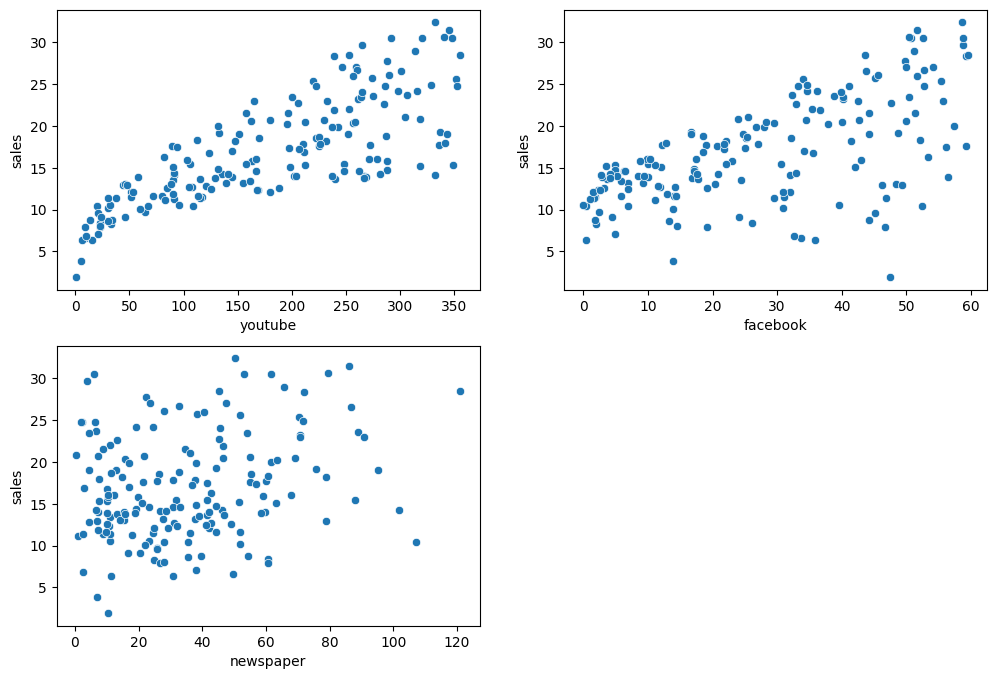

In [9]:
columns=['youtube', 'facebook', 'newspaper'] #list of input column name
plt.figure(figsize=(12,8))
for i,col in enumerate(columns):
  plt.subplot(2,2,i+1)
  sns.scatterplot(data=df,x=col,y="sales")

In [10]:
#see this graph, positive correlation between tv and sales and redio with sales 
#and no any correlation between nwespaper with sales

<AxesSubplot: >

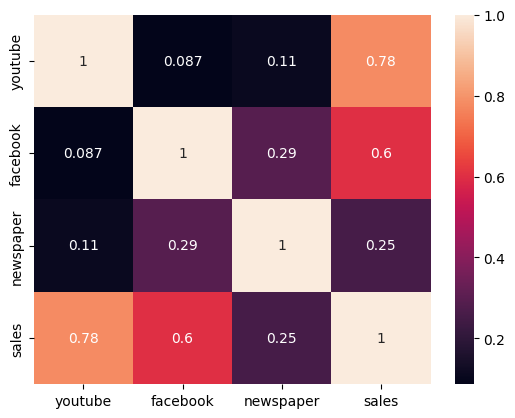

In [11]:
#check correlaton between each input with output
sns.heatmap(df.corr(),annot=True)

In [12]:
#correlation values with TV and sales=0.78 , It is very good
#correlation values with facebook and sales=0.6 , It is good(ok)
#correlation values with newspaper and sales=0.25 , It is very bad

In [13]:
#Performing the modeling 
#Modeling with input : youtube and output sales 
#SLR(simple linear regression) : only one input
#Select input and output from dataset
x=df[['youtube']] #input always 2D array
y=df['sales'] #output always 1D array

In [14]:
x.shape

(171, 1)

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [16]:
x_train.sample(4)

,youtube
114,125.52
10,273.60
115,115.44
23,259.68


In [17]:
x_test.shape

(52, 1)

In [18]:
x_test.sample(4)

,youtube
85,93.84
105,44.28
161,47.40
97,9.36


In [19]:
#Train the model with 70% training data
#train with Linear Regression
from sklearn.linear_model import LinearRegression

In [20]:
#create the object LinearRegression() model
lr=LinearRegression()

In [21]:
#train the model
lr.fit(x_train,y_train)

LinearRegression()

In [22]:
#slop/cofficeant
lr.coef_

array([0.046816])

In [23]:
# To check intercept
lr.intercept_

8.322622252454364

In [24]:
#test the model 30% data
y_pred=lr.predict(x_test)

In [25]:
#create a dictionary
dff={"Actual output ":y_test,"Predicted output":y_pred}
#convert into dataframe
df1=pd.DataFrame(dff)
#to add input x_test
df1["x_test"]=x_test
df1.sample(15)

,Actual output,Predicted output,x_test
33,18.84,21.766305,287.16
147,24.24,22.277536,298.08
154,31.44,24.479761,345.12
84,19.08,20.097783,251.52
85,17.52,12.715836,93.84
163,7.08,9.288905,20.64
97,7.92,8.760820,9.36
108,24.96,23.698870,328.44
39,22.68,21.659565,284.88
18,27.84,21.800013,287.88


In [26]:
#find mean squared error use inbulid method mean squared_error
from sklearn.metrics import mean_squared_error
m=mean_squared_error(y_test,y_pred)
print(m)

14.54307339162559


In [27]:
#find root mean squared error
R=np.sqrt(m)
print(R)

3.813538172304768


In [28]:
#check model succesfully model or not
#use R2 score
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

0.6383711411124144


In [29]:
#score is good but not better, behind reson: model is underfit

In [30]:
#Performing the modeling with the help of simple linear Reegression
#modeling with input facebook and target sales
#step 1 : First input means X and output Y(target)
x=df[['facebook']] #input
y=df['sales'] #output

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [32]:
#train the model with linear regression
#create object odf linearregression class
lr=LinearRegression()
lr.fit(x_train,y_train)#train the model with 70% data

LinearRegression()

In [33]:
#check slope means cofficient of input radio
lr.coef_

array([0.20719997])

In [34]:
#check intercepts
lr.intercept_

11.055473741613742

In [35]:
#test the model with 30%data
y_pred=lr.predict(x_test)

In [36]:
#check mean squared error
mse=mean_squared_error(y_test,y_pred)
print(mse)

24.518274356463127


In [37]:
#root mean squared error
rmse=np.sqrt(mse)
print(rmse)

4.95159311297517


In [38]:
#find r2_score
r2_score(y_test,y_pred)

0.39032724798554896

In [39]:
#Performing the modeling with the help of simple linear Reegression
#modeling with input newspaper and target sales
#step 1 : First input means X and output Y(target)
x=df[['newspaper']] #input
y=df['sales'] #output

In [40]:
#train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [41]:
#train the model with linear regression
#create object odf linearregression class
lr=LinearRegression()
lr.fit(x_train,y_train)#train the model with 70% data

LinearRegression()

In [42]:
#check slope means cofficient of input radio
lr.coef_

array([0.08661736])

In [43]:
#check intercepts
lr.intercept_

13.552551489249389

In [44]:
#test the model with 30%data
y_pred=lr.predict(x_test)

In [45]:
#check mean squared error
mse=mean_squared_error(y_test,y_pred)
print(mse)

44.43451555982313


In [46]:
#root mean squared error
rmse=np.sqrt(mse)
print(rmse)

6.665921958725825


In [47]:
#find r2_score
r2_score(y_test,y_pred)

-0.10491109577804103

In [48]:
df.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [49]:
x=df[["youtube","facebook","newspaper"]] #or x=df.drop("sales",axis=1) input
y=df["sales"]
#this is a multiple linear regression, becouse many input, here we have
#3 input and output is one
#y_pred=m1*x1+m2*x2+m3*x3+c

In [50]:
x.head()

,youtube,facebook,newspaper
0,84.72,19.20,48.96
1,351.48,33.96,51.84
2,135.48,20.88,46.32
3,116.64,1.80,36.00
4,318.72,24.00,0.36


In [51]:
#train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [52]:
x_train.head()

,youtube,facebook,newspaper
143,23.52,24.12,20.40
12,212.40,40.08,46.44
93,268.80,2.88,18.72
91,169.56,32.16,55.44
28,163.44,23.04,19.92


In [53]:
#send data to liner regression algorithem
#create object of linear rigression class
lr=LinearRegression()

In [54]:
#train the model with 70% data
lr.fit(x_train,y_train)

LinearRegression()

In [55]:
#check slope/coefficient
lr.coef_

array([0.04473136, 0.189319  , 0.0065438 ])

In [56]:
x.columns

Index(['youtube', 'facebook', 'newspaper'], dtype='object')

In [57]:
''' slope of youtube : 0.04473136 and MSE of TV  :  14.54307339162559
    slope of facebook :0.189319 and MSE of radio : 24.518274356463127
    slope of newspaper : 0.0065438 and MSE of newspaper :44.43451555982313 '''

' slope of youtube : 0.04473136 and MSE of TV  :  14.54307339162559\n    slope of facebook :0.189319 and MSE of radio : 24.518274356463127\n    slope of newspaper : 0.0065438 and MSE of newspaper :44.43451555982313 '

In [58]:
#but take youtube,facebook and newspaper together then no changes the value of 
#slope of youtube and facebook .
#but slope of newspaper =0 means changed

In [59]:
#test the model with 30% data
y_pred=lr.predict(x_test) #y_pred=m1*tv+m2*radio+m3*nwespaper+c/

In [60]:
#find mean squared error
mean_squared_error(y_test,y_pred)

3.1704777165210083

In [61]:
#find the r2_score
r2_score(y_test,y_pred)

0.9211627275831376

In [62]:
#here r2-score is best because nearest to +1 and MSE is very low means we
#create a successful model

In [63]:
#Assumptions of Linear Regression

<AxesSubplot: >

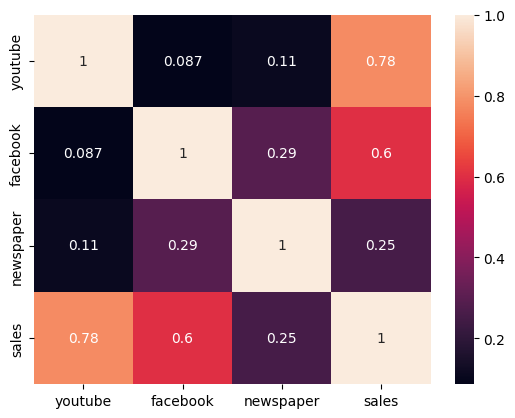

In [64]:
sns.heatmap(df.corr(),annot=True)

In [65]:
#corr value of input facebook with output sales :  0.6
#corr value of input newspaper with output sales : 0.25
#corr value of facebook and newspaper(both are input and correlated each other:0.29
#so we decided , remove newspaper because corr of facebook with sales>newspaper 
#with sales
#We have input youtube and facebook and target sales

In [66]:
#we have input tv and radio and target sales
x=df[["youtube","facebook"]] #input
y=df["sales"] #output

In [67]:
x.head()

,youtube,facebook
0,84.72,19.20
1,351.48,33.96
2,135.48,20.88
3,116.64,1.80
4,318.72,24.00


In [68]:
#train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [69]:
#create object of linear rigression class
lr=LinearRegression()

In [70]:
#train the model with 70% data
lr.fit(x_train,y_train)

LinearRegression()

In [71]:
#check slope/coefficient
lr.coef_

array([0.04495998, 0.19260119])

In [72]:
#check intercepts
lr.intercept_

3.507375041822943

In [73]:
#test the model with 30% data
y_pred=lr.predict(x_test) #y_pred=m1*tv+m2*radio+m3*nwespaper+c

In [74]:
#find mean squared error
mean_squared_error(y_test,y_pred)

3.1430549693348167

In [75]:
#find the r2_score
r2_score(y_test,y_pred)

0.9218446231154956

In [76]:
#work on 2nd assumption
#check inear realtion between input(youtube and facebook) and output

In [77]:
#find the residuals for each datapoint
residuals=y_test-y_pred
print(residuals)

92    -1.137007
113    1.042982
19    -1.656983
69     1.566300
53     1.298276
161   -2.177569
108    0.006559
14    -1.131460
99     2.922054
107   -2.502281
11     0.333341
4     -1.579449
117   -2.308432
42     2.143661
122    1.943015
125    0.203781
147    0.351086
35     1.127524
81    -1.504928
31     2.863951
51     0.359752
75     0.553799
78     1.986030
73    -3.199046
40     1.409605
84    -0.496811
47     2.919151
29     2.215925
16    -0.274599
105   -1.459490
85    -1.022902
154    2.477814
157    0.840969
5      2.405850
94     0.094335
89     0.262481
88     3.465797
165    0.948091
110    1.210673
48     0.444451
54    -1.162594
59     1.315069
97    -4.998824
39     0.008586
56     0.056468
44     1.393847
163    1.697053
33    -1.160466
18     1.798006
58     0.336611
123    0.366585
126   -2.569587
Name: sales, dtype: float64


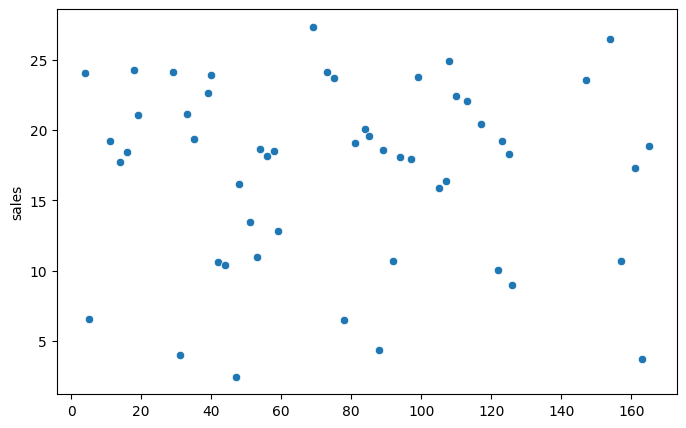

In [78]:
#visualize scatterplot between Y_pred and residuals means
#here input x=Y_pred and y=residuals because residuals depend on y_pred value
plt.figure(figsize=(8,5))
sns.scatterplot(y_pred-residuals)
plt.show()

In [79]:
#3. Assumption :  if occur linear relation then next check relation is 
#homoskedatik not a heteroskedastik

<AxesSubplot: xlabel='sales', ylabel='Count'>

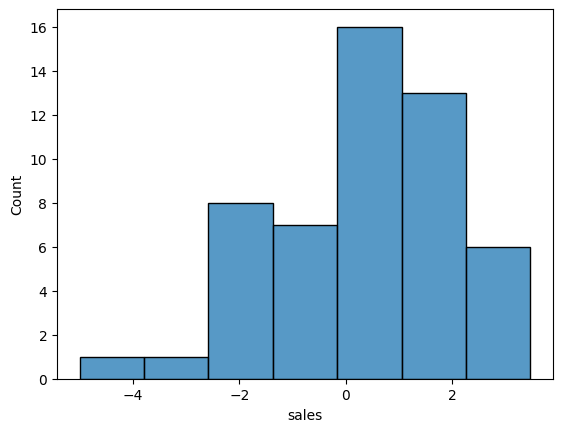

In [80]:
#work on 4th assumption
sns.histplot(residuals)

<AxesSubplot: xlabel='sales', ylabel='Density'>

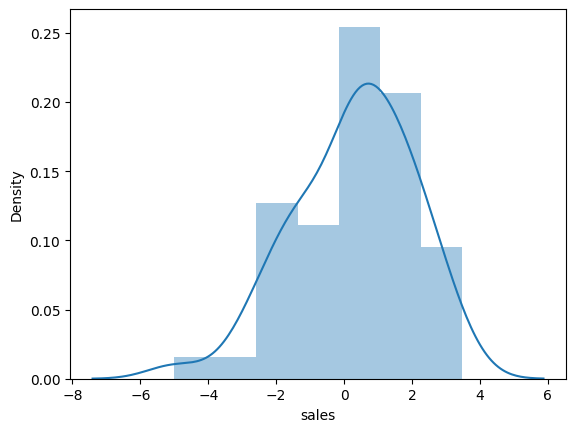

In [81]:
sns.distplot(residuals)

In [82]:
residuals.skew()

-0.5692548581896707

In [83]:
#find the r2_score
r2_score(y_test,y_pred)

0.9218446231154956

In [84]:
#Model with two variable (Youtube and Facebook) have the highest score 
#here r2-score is best because nearest to +1 and MSE is very low means we
#successful model